<div style="text-align: right">hidekuno@gmail.com<br>2021-03-24</div> 

# SICP Picture Language(numpy version)
   Implemented with numpy by referring to https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-15.html#%_sec_2.2.4

### import picture-language.ipynb
- Need ipynb(https://github.com/yuvipanda/ipynb) to work(Refer to the following command for installation)
```
pip3 install ipynb
```

In [1]:
import ipynb.fs.defs.picture_language
from ipynb.fs.defs.picture_language import draw_init
from ipynb.fs.defs.picture_language import draw_line
from ipynb.fs.defs.picture_language import corner_split
from ipynb.fs.defs.picture_language import square_limit
from ipynb.fs.defs.picture_language import origin_frame
from ipynb.fs.defs.picture_language import edge1_frame
from ipynb.fs.defs.picture_language import edge2_frame
from ipynb.fs.defs.picture_language import xcor_vect
from ipynb.fs.defs.picture_language import ycor_vect
from ipynb.fs.defs.picture_language import wave

import numpy as np
from math import sin
from math import cos
from math import pi

###  Constructor of Frame

In [2]:
def make_frame(origin, edge1, edge2): return np.array([origin, edge1, edge2])

ipynb.fs.defs.picture_language.make_frame = make_frame

### Constructor of Vector

In [3]:
def make_vect(x, y): return np.array([x, y])

ipynb.fs.defs.picture_language.make_vect = make_vect

### Map the vector into the frame

In [4]:
def frame_coord_map(frame):
    return lambda v: origin_frame(frame) + xcor_vect(v) * edge1_frame(frame) + ycor_vect(v) * edge2_frame(frame)

ipynb.fs.defs.picture_language.frame_coord_map = frame_coord_map

### construct how to transform a frame and produces a new painter

In [5]:
def transform_painter(painter, origin, corner1, corner2):
    def _lambda(frame):
        m = frame_coord_map(frame)
        new_origin = m(origin)
        return painter(make_frame(new_origin, m(corner1) - new_origin, m(corner2) - new_origin))
    return _lambda

ipynb.fs.defs.picture_language.transform_painter = transform_painter

### Constructor of segment

In [6]:
def make_segment(start, end): return np.array([start,end])

ipynb.fs.defs.picture_language.make_segment = make_segment

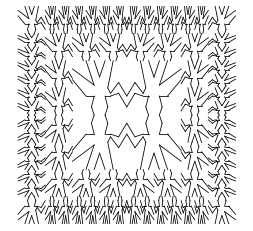

In [7]:
frame = make_frame(make_vect(0, 0),make_vect(1, 0),make_vect(0, 1))
draw_init()
square_limit(wave(),2)(frame)

### constructor matrix(2x2)

In [8]:
def make_matrix(a,b,c,d):
    return np.array([[a,b],[c,d]])

### Koch curve

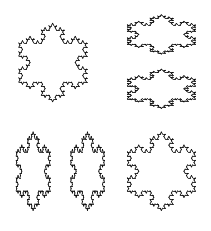

In [9]:
def koch(n):
    cs = cos((pi * 60) / 180)
    sn = sin((pi * 60) / 180)
    def _lambda(frame):
        m =  frame_coord_map(frame)

        def koch_iter(v0, v1, c):
            if c > 1:
                va = (v0 * 2 + v1) / 3
                vb = (v1 * 2 + v0) / 3
                vc = va + (make_matrix(cs,-sn,sn,cs) * (vb-va)).sum(axis=1)

                koch_iter(v0, va, c - 1)
                koch_iter(va, vc, c - 1)
                koch_iter(vc, vb, c - 1)
                koch_iter(vb, v1, c - 1)
            else:
                draw_line(m(v0), m(v1))

        va = make_vect(0.04722222222222222, 0.6964285714285714)
        vb = make_vect(0.6708333333333333, 0.6964285714285714)
        vc = va + (make_matrix(cs,sn,-sn, cs) * (vb-va)).sum(axis=1)

        koch_iter(vc,va,n)
        koch_iter(va,vb,n)
        koch_iter(vb,vc,n)
    return _lambda

draw_init()
corner_split(koch(4),1)(frame)

### Koch curve

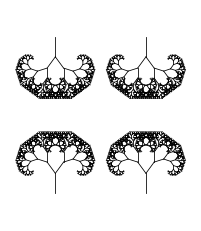

In [10]:
def tree(n):
    def _lambda(frame):
        cs = cos((pi * 15) / 180)
        sn = sin((pi * 45) / 180)
        alpha = 0.6
        m = frame_coord_map(frame)

        def tree_iter(v0, v1, c):

            va = v1 + (make_matrix(cs,-sn,sn,cs) * (v1-v0) * alpha).sum(axis=1)
            vb = v1 + (make_matrix(cs,sn,-sn,cs) * (v1-v0) * alpha).sum(axis=1)

            draw_line(m(v0), m(v1))
            if  0 >= c:
                draw_line(m(v1), m(va))
                draw_line(m(v1), m(vb))
            else:
                tree_iter(v1, va, c - 1)
                tree_iter(v1, vb, c - 1)
        tree_iter(make_vect(0.4166666666666667, 0.7142857142857143),
                  make_vect(0.4166666666666667, 0.5357142857142857), n)
    return _lambda

draw_init()
square_limit(tree(8), 0)(frame)

### Sierpinski gasket

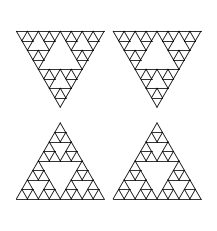

In [11]:
def sierpinski(n):
    def _lambda(frame):
        m =  frame_coord_map(frame)

        def sierpinski_iter(v0, v1, v2, c):
            if c > 1:
                vv0 = (v0 + v1) / 2
                vv1 = (v1 + v2) / 2
                vv2 = (v2 + v0) / 2

                sierpinski_iter(v0, vv0, vv2, c-1)
                sierpinski_iter(v1, vv0, vv1, c-1)
                sierpinski_iter(v2, vv2, vv1, c-1)
            else:
                draw_line(m(v0), m(v1))
                draw_line(m(v1), m(v2))
                draw_line(m(v2), m(v0))

        cs = cos((pi * 60) / 180)
        sn = sin((pi * 60) / 180)
        v0 = make_vect(0.04178272980501393, 0.7706093189964157)  
        v1 = make_vect(0.8481894150417827, 0.7706093189964157)
        v2 = v0 + (make_matrix(cs,sn,-sn,cs) * (v1 - v0)).sum(axis=1)

        sierpinski_iter(v2, v0, v1, n)
    return _lambda

draw_init()
square_limit(sierpinski(4), 0)(frame)